- ml stands for optimization with model that accepts two parameters (lambda and mu)

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
import json
import seaborn as sns
import numpy as np

In [216]:
import cufflinks as cf
cf.go_offline()

In [1]:
%run Pickle_utils.ipynb

# Iterative 52 weeks Forecasting

- $mu*kernel1 + lmbda*kernel2$

- $mu, lmbda > 0$

During this optimization, no exploration limits were set, aside from each variable boundaries. Therefore, a broad range of MAPE values were obtained. The search was narrowed by specifying it on the optimizer (since march 10: 10_04_2021_22_32_51).

## Get all pickle files

- One file for each set of hyperparameters

In [217]:
# list of Pickle files names
path = Path().resolve().parent / 'Pickles'/ 'K_75_52_mu_lambda'
list_dir = listdir(path)
files = [ld for ld in list_dir if ld[-2:-1].isdigit()]

In [219]:
pkls = pickleUtilss.open_pickle(path, files)

In [220]:
len(pkls.keys()), pkls.keys() # dict keys/File names

(35,
 dict_keys(['07_04_2021_13_19_55', '07_04_2021_14_00_17', '07_04_2021_14_46_22', '07_04_2021_15_32_29', '07_04_2021_17_41_13', '07_04_2021_20_09_58', '07_04_2021_20_53_48', '07_04_2021_21_36_23', '07_04_2021_22_18_48', '08_04_2021_00_17_27', '08_04_2021_00_57_47', '08_04_2021_01_43_47', '08_04_2021_08_35_16', '08_04_2021_09_20_25', '08_04_2021_10_11_48', '10_04_2021_22_32_51', '10_04_2021_23_28_22', '11_04_2021_00_30_28', '11_04_2021_01_32_51', '11_04_2021_02_36_19', '11_04_2021_03_37_19', '11_04_2021_04_35_18', '11_04_2021_05_22_47', '11_04_2021_06_21_08', '11_04_2021_07_26_23', '11_04_2021_08_25_10', '11_04_2021_09_25_47', '11_04_2021_10_31_56', '11_04_2021_11_30_40', '11_04_2021_12_35_08', '11_04_2021_13_32_47', '11_04_2021_14_29_53', '11_04_2021_15_32_27', '11_04_2021_16_29_52', '11_04_2021_17_27_52']))

In [221]:
#First index indicates set of predictions with specific hyperparameters. second index indicates week (0 contain hyp.)
pkls[[*pkls.keys()][0]][0]#\pkls[07_04_2021_13_19_55][0].

{'kernel': 'rbf',
 'C': 4.228517846555483,
 'epsilon': 7.20604168948716,
 'mu': 0.7423118951773942,
 'lmbda': 1.5186395374328805,
 'gamma': 0.00011142604425275418}

In [222]:
# Dataset's least week [1] prediction for hyperparameters on [0].
ma = pkls[[*pkls.keys()][0]][1].error.mean()*100
pkls[[*pkls.keys()][0]][1][["real", "predict"]].iplot(title = f"MAPE: {ma:.2f}")

## Joins weeks on each file

In [224]:
jointed = pickleUtilss.join_pickle(pkls)

In [248]:
# hyperparameters values for file
pkls[[*pkls.keys()][-1]][0]

{'kernel': 'rbf',
 'C': 1.5622596668986724,
 'epsilon': 0.01,
 'mu': 0.8894683237212756,
 'lmbda': 0.7147423174236999,
 'gamma': 0.009632563464115184}

In [249]:
# Plot specific file real and prediction
mape = jointed[[*jointed.keys()][-1]].error.mean()*100
jointed[[*jointed.keys()][-1]][["real", "predict"]].iplot(title = f"MAPE: {mape:.2f}")

## Plot specific predictions vs real

In [204]:
lok = pickleUtilss.concat_pred(jointed)

In [205]:
lok.iplot() # double click on name to plot single plots

## Plot all/specific error

In [207]:
error_tot = pickleUtilss.concat_error(jointed)

In [213]:
error_tot.mean()*100

07_04_2021_13_19_55     2.570842
07_04_2021_14_00_17     2.694270
07_04_2021_14_46_22     2.952639
07_04_2021_15_32_29     9.842445
07_04_2021_17_41_13     2.505389
07_04_2021_20_09_58    84.778880
07_04_2021_20_53_48     3.928083
07_04_2021_21_36_23     2.612366
07_04_2021_22_18_48     2.541685
08_04_2021_00_17_27     2.570843
08_04_2021_00_57_47     2.693418
08_04_2021_01_43_47     2.953764
08_04_2021_08_35_16     9.819757
08_04_2021_09_20_25    31.480736
08_04_2021_10_11_48     7.896598
10_04_2021_22_32_51     2.635459
10_04_2021_23_28_22     2.392319
11_04_2021_00_30_28     2.440446
11_04_2021_01_32_51     2.649777
11_04_2021_02_36_19     5.470557
11_04_2021_03_37_19     2.430539
11_04_2021_04_35_18     2.424397
11_04_2021_05_22_47     2.246302
11_04_2021_06_21_08     2.230949
11_04_2021_07_26_23     2.573821
11_04_2021_08_25_10     2.615785
11_04_2021_09_25_47     2.609438
11_04_2021_10_31_56     2.576119
11_04_2021_11_30_40     2.583270
11_04_2021_12_35_08     2.627786
11_04_2021

In [246]:
error_tot[["11_04_2021_17_27_52"]]

,11_04_2021_17_27_52
2019-04-02,0.030588
2019-04-03,0.050644
2019-04-04,0.043867
2019-04-05,0.056252
2019-04-06,0.043814
...,...
2020-03-26,0.036823
2020-03-27,0.047176
2020-03-28,0.044865
2020-03-29,0.043752


In [209]:
error_tot.iplot()

# Target against parameters mu & lambda

## Load data 

In [139]:
path_json = Path().resolve().parent / 'Logs' / 'log_52weeks_mulambda.json'

In [141]:
# read data in json file containing target and hyperparameters
data = []
for line in open(path_json, 'r'):
    data.append(json.loads(line))

In [142]:
# creates dataframe with scaled target (for corrections)
def create_dataframe_scaled(data, scale):
    itera = range(len(data))
    #hyperparameters
    hyper = [[*data[i]['params'].values()] for i in itera]
    df = pd.DataFrame(hyper, columns = [*data[0]['params'].keys()])
    # target
    df["target"] = [-data[i]['target']*scale for i in itera]
    # datetime
    df["datetime"] = [data[i]['datetime']['datetime'] for i in itera]
    return df

In [143]:
df = create_dataframe_scaled(data = data, scale = 53/52)

## Plot

In [214]:
df

,C,epsilon,gamma,lmbda,mu,target,datetime
0,4.228518,7.206042,0.001011,1.518640,0.742312,2.362587,2021-04-07 06:51:42
1,1.014152,1.870740,0.035211,1.989870,2.698696,2.626508,2021-04-07 07:33:20
2,4.250026,6.855343,0.021241,4.391806,0.146664,3.355231,2021-04-07 08:19:06
3,6.737628,4.178875,0.056310,0.710531,0.998526,7.974137,2021-04-07 09:02:46
4,8.027371,9.682933,0.032029,3.464690,4.383182,33.101333,2021-04-07 09:47:22
5,8.956606,0.859592,0.004866,0.857454,4.391931,6.069847,2021-04-07 10:36:40
6,4.092077,6.920594,0.008237,2.541153,0.409411,2.566394,2021-04-07 11:25:36
7,3.941882,7.538179,0.001000,1.922291,0.313941,2.352132,2021-04-07 12:14:59
8,4.228518,7.206042,0.000111,1.518640,0.742312,2.570842,2021-04-07 13:19:55
9,1.014152,1.870740,0.034622,1.989870,2.698696,2.694270,2021-04-07 14:00:18


In [144]:
df.columns

Index(['C', 'epsilon', 'gamma', 'lmbda', 'mu', 'target', 'datetime'], dtype='object')

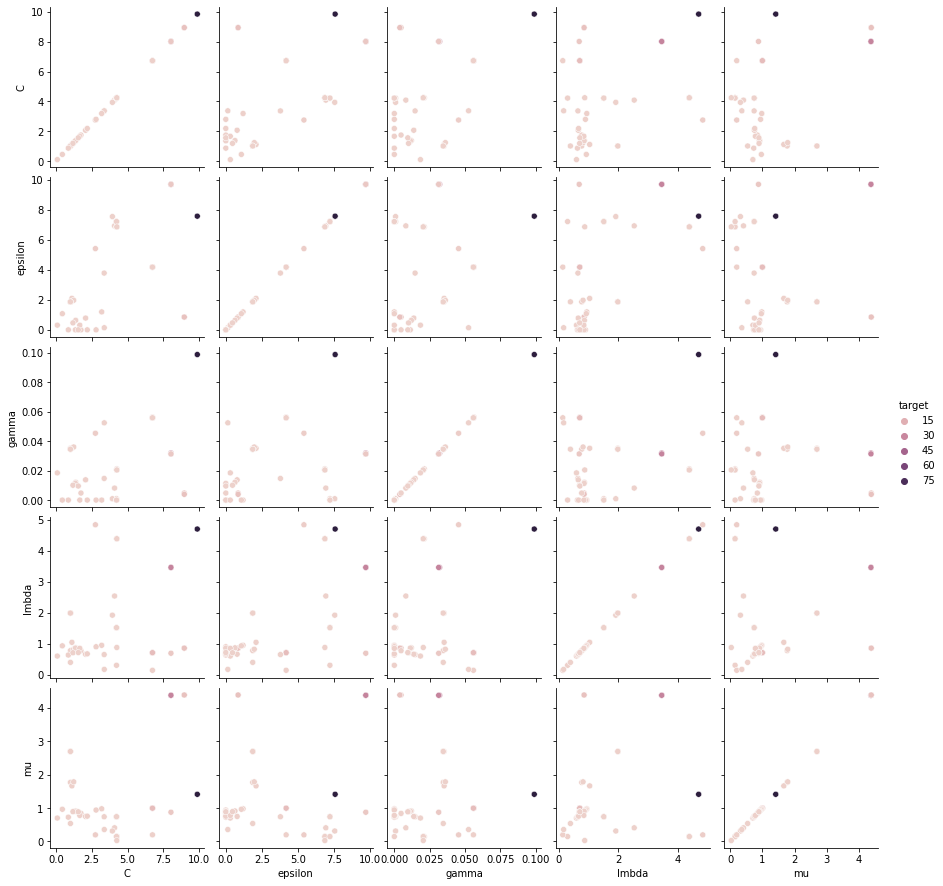

In [145]:
sns.pairplot(data = df, hue = "target", kind = "scatter", diag_kind = None);

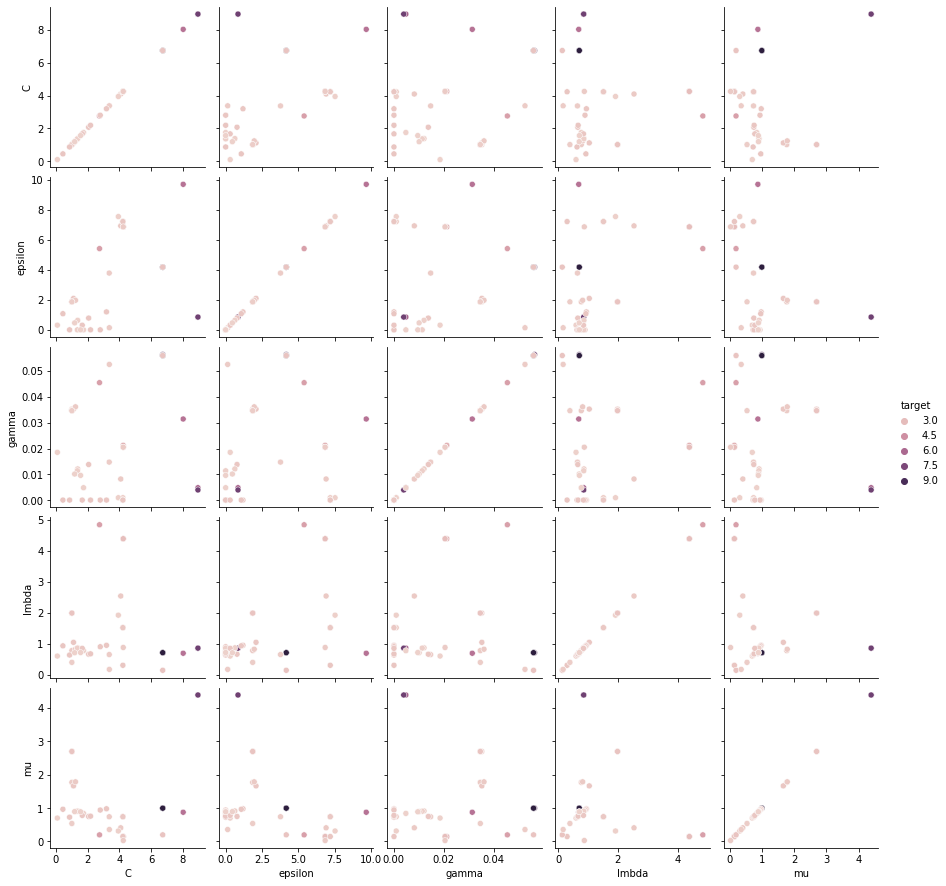

In [150]:
filter1 = df.query("target < 20")
sns.pairplot(data = filter1, hue = "target", kind = "scatter", diag_kind = None);

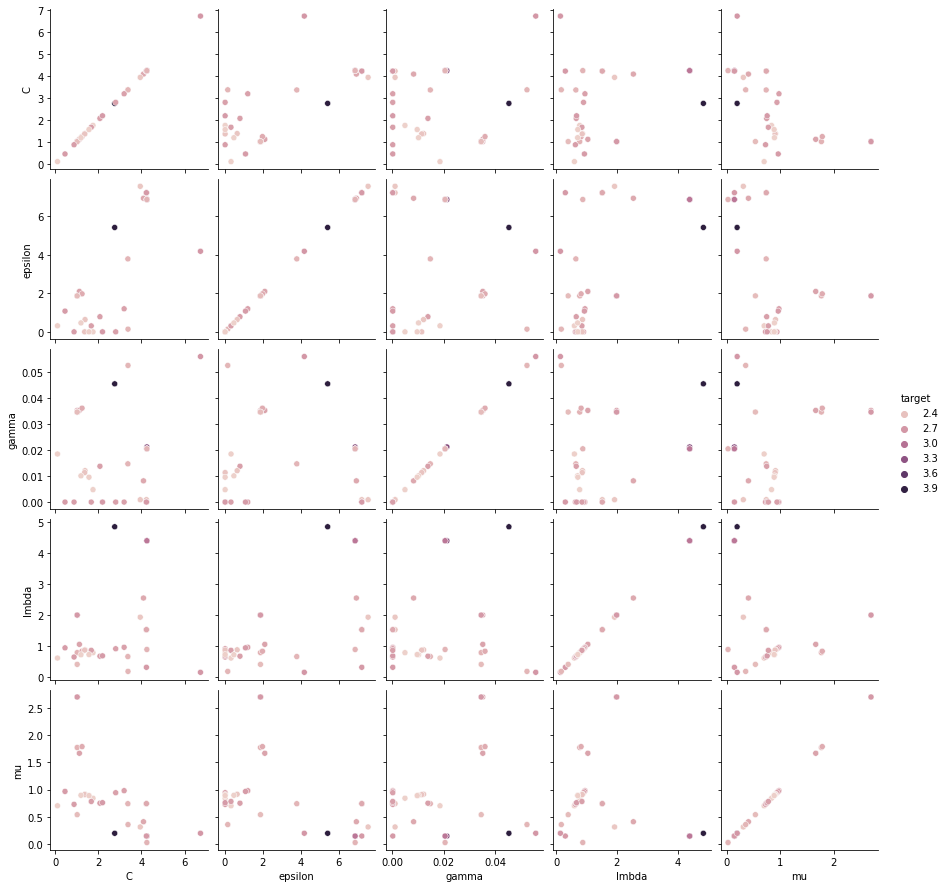

In [157]:
filter2 = df.query("target < 5")
sns.pairplot(data = filter2, hue = "target", kind = "scatter", diag_kind = None);

In [158]:
import plotly.express as px

In [161]:
filter_ = filter1.drop(["datetime"], axis = 1)
px.scatter_matrix(filter_, color="target")

<AxesSubplot:xlabel='C', ylabel='gamma'>

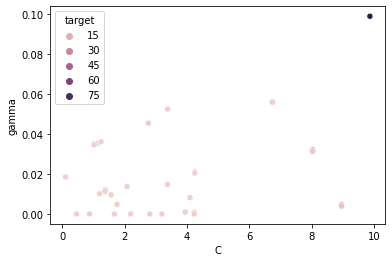

In [160]:
sns.scatterplot(x = df.C, y = df.gamma, hue = df.target)

## SVR hyperparameter prediction

In [184]:
from sklearn.linear_model import LinearRegression

In [186]:
def kronecker(data1:'Dataframe 1',data2:'Dataframe 2'):
    Combination = pd.DataFrame(); d1 = pd.DataFrame()
    for i in data2.columns:
        d1 = data1.multiply(data2[i] , axis="index")
        d1.columns = [f'{i}{j}' for j in data1.columns]
        Combination = pd.concat([Combination, d1], axis = 1)
    return Combination

In [175]:
X = df.drop(["datetime", "target"], axis = 1); y = df.target

In [ ]:
kronecker(X, X)

In [177]:
lin = LinearRegression().fit(X, y).predict(X)

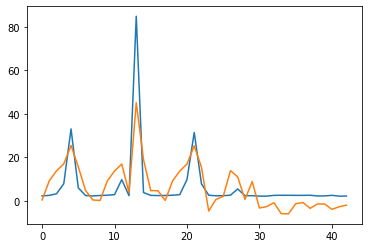

In [180]:
plt.plot(df.target)
plt.plot(lin)

In [183]:
np.mean(np.abs((y - lin)/lin))

1.7486080801234376